<a href="https://colab.research.google.com/github/FerLucas7/Technolochicas_DataAalysis_M2/blob/main/Modulo2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/technolochicas/Avocado_HassAvocadoBoard_20152023v1.0.1.csv')
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


In [8]:
#obtener un resumen estadistico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,53415.0,1.428910,3.931160e-01,0.44,1.119091,1.40,1.690,3.440830e+00
TotalVolume,53415.0,869447.441374,3.545274e+06,84.56,16264.655000,120352.46,454238.015,6.103446e+07
plu4046,53415.0,298270.749448,1.307669e+06,0.00,694.725000,14580.58,128792.380,2.544720e+07
plu4225,53415.0,222217.037654,9.554624e+05,0.00,2120.800000,17516.63,93515.600,2.047057e+07
plu4770,53415.0,20531.954686,1.040977e+05,0.00,0.000000,90.05,3599.735,2.860025e+06
TotalBags,53415.0,217508.289491,8.676947e+05,0.00,7846.520000,36953.10,111014.610,1.629830e+07
SmallBags,41025.0,103922.170677,5.692608e+05,0.00,0.000000,694.58,37952.980,1.256716e+07
LargeBags,41025.0,23313.164066,1.496622e+05,0.00,0.000000,0.00,2814.920,4.324231e+06
XLargeBags,41025.0,2731.811796,2.258910e+04,0.00,0.000000,0.00,0.000,6.795868e+05


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53415 non-null  object 
 1   AveragePrice  53415 non-null  float64
 2   TotalVolume   53415 non-null  float64
 3   plu4046       53415 non-null  float64
 4   plu4225       53415 non-null  float64
 5   plu4770       53415 non-null  float64
 6   TotalBags     53415 non-null  float64
 7   SmallBags     41025 non-null  float64
 8   LargeBags     41025 non-null  float64
 9   XLargeBags    41025 non-null  float64
 10  type          53415 non-null  object 
 11  region        53415 non-null  object 
dtypes: float64(9), object(3)
memory usage: 4.9+ MB


# Limpieza de datos

In [11]:
df.dropna(inplace=True)
df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


## Uso de boxplot

<Axes: xlabel='AveragePrice'>

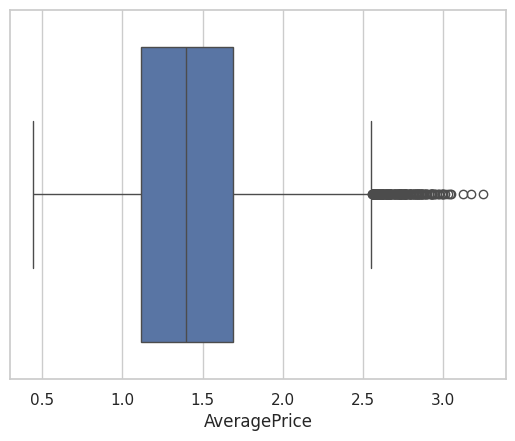

In [7]:
sns.set(style="whitegrid")
sns.boxplot(x=df['AveragePrice'])

In [8]:
iqr = df['AveragePrice'].quantile(0.75) - df['AveragePrice'].quantile(0.25)
filtro_inferior = df['AveragePrice'] > df['AveragePrice'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['AveragePrice'] < df['AveragePrice'].quantile(0.75) + (iqr * 1.5)

lower_bound = df['AveragePrice'].quantile(0.25) - 1.5 * iqr
upper_bound = df['AveragePrice'].quantile(0.75) + 1.5 * iqr

val_atipico = (df['AveragePrice'] < lower_bound) | (df['AveragePrice'] > upper_bound)
df_filtrado = df[filtro_inferior & filtro_superior]

numero de valores atipicos en AveragePrice: 242


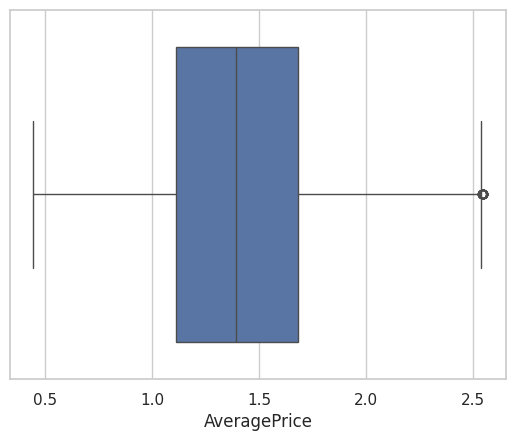

In [9]:
sns.boxplot(x=df_filtrado['AveragePrice'])
print(f"numero de valores atipicos en AveragePrice: {val_atipico.sum()}")

In [10]:
#identificar filas con valores faltantes
df = df[~val_atipico]

In [11]:
missing_rows = df[df[['SmallBags', 'LargeBags', 'XLargeBags']].isnull().any(axis=1)]

for index, row in missing_rows.iterrows():
    # Generar nuevos valores
    valores_random = np.random.dirichlet(np.ones(3), size=1)[0]

    # Se calcula el valor restante necesario para que la suma de 'SmallBags', 'LargeBags', y 'XLargeBags' sea igual al valor de la columna 'TotalBags' en esa fila.
    remaining_value = row['TotalBags'] - row[['SmallBags', 'LargeBags', 'XLargeBags']].sum()

    # Rellenar los valores faltantes
    df.at[index, 'SmallBags'] = remaining_value * valores_random[0]
    df.at[index, 'LargeBags'] = remaining_value * valores_random[1]
    df.at[index, 'XLargeBags'] = remaining_value * valores_random[2]

# Verificar que no haya valores faltantes
print(df[['TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']].isnull().sum())

TotalBags     0
SmallBags     0
LargeBags     0
XLargeBags    0
dtype: int64


# Histograma

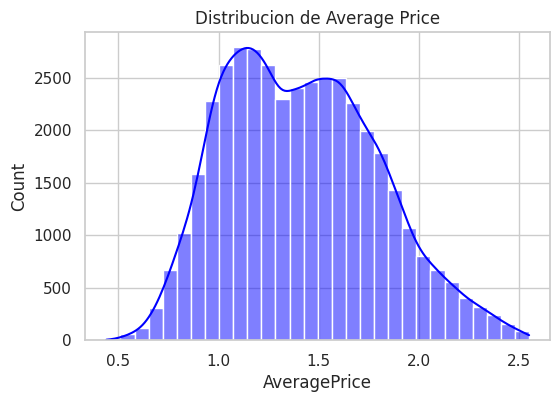

In [12]:
#histograma del precio
plt.figure(figsize=(6, 4))
sns.histplot(df['AveragePrice'], bins=30, kde=True, color='blue')
plt.title('Distribucion de Average Price')
plt.show()

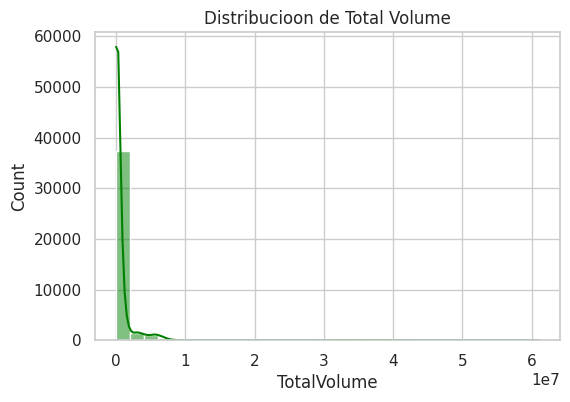

In [16]:
#histograma del volumen
plt.figure(figsize=(6, 4))
sns.histplot(df['TotalVolume'], bins=30, kde=True, color='green')
plt.title('Distribucioon de Total Volume')
plt.show()

# Error estándar e intervalos de confianza

In [42]:
AveragePrice = df['AveragePrice']
means = []

for i in range(10_000):
    sample = AveragePrice.sample(n=50, replace=True)
    means.append(sample.mean())

serie_promedio = pd.Series(means)

In [43]:
print(f'Error estandar: {serie_promedio.std()}')

Error estandar: 0.05452085222567938


In [44]:
#necesario conocer el rango de los valores para una interpretacion de la desviación estandar
print(f'Valor mínimo: {serie_promedio.min()}')
print(f'Valor máximo: {serie_promedio.max()}')
print(f'Rango: {serie_promedio.max() - serie_promedio.min()}')

Valor mínimo: 1.20639507754
Valor máximo: 1.632762195
Rango: 0.4263671174599999


<Axes: xlabel='None'>

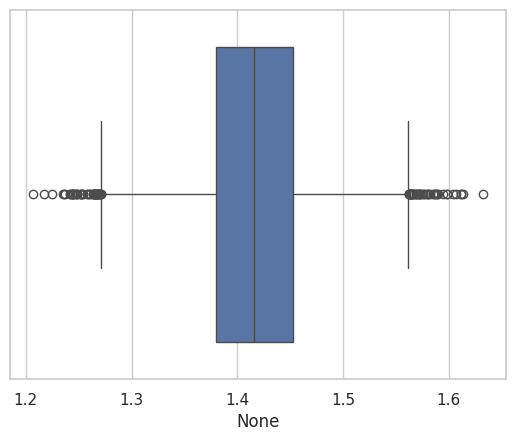

In [45]:
sns.boxplot(x=serie_promedio)

Intervalo de 95% confianza de la media: 1.311949178392 < 1.415977806495525 < 1.5245379343040002


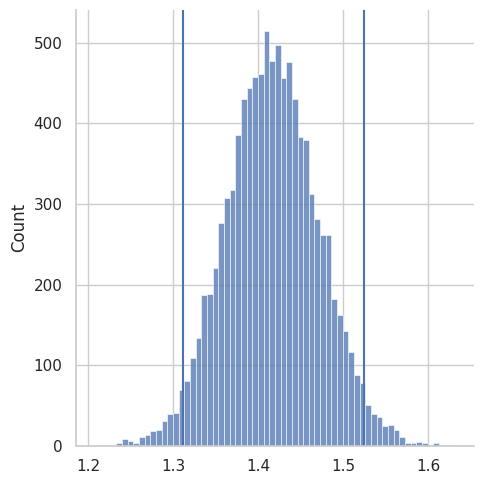

In [56]:
#intervalos de cofianza
limite_inferior = serie_promedio.quantile(0.025)
limite_superior = serie_promedio.quantile(0.975)

print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {AveragePrice.mean()} < {limite_superior}')
mean_of_intervals = ((AveragePrice.mean() - limite_inferior) + (limite_superior - AveragePrice.mean())) / 2

sns.displot(serie_promedio, kde=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

# Graficas de Densidad

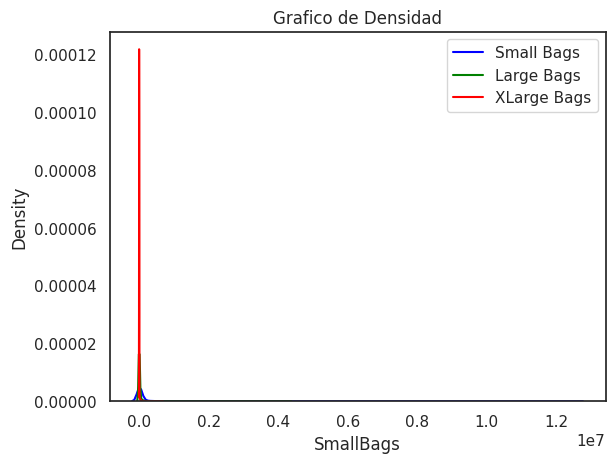

In [ ]:
sns.set(style='white')

sns.kdeplot(df['SmallBags'], color='blue', label='Small Bags')
sns.kdeplot(df['LargeBags'], color='green', label='Large Bags')
sns.kdeplot(df['XLargeBags'], color='red', label='XLarge Bags')
plt.legend()
plt.title('Grafico de Densidad')
plt.show()


#Grafico de barras

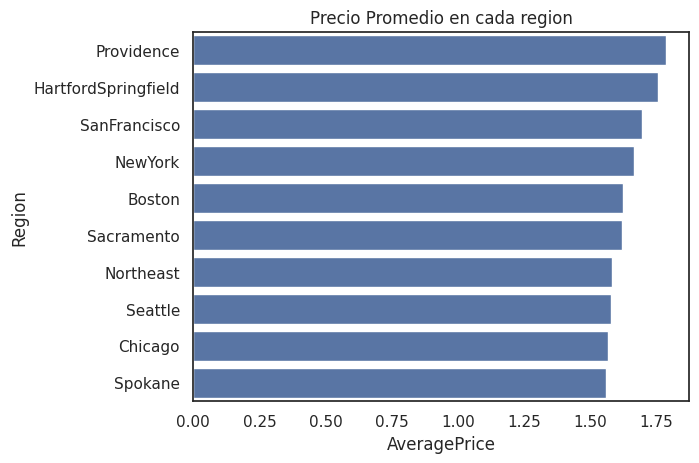

In [ ]:
#agrupar por region y graficar el precio promedio para cada region
grupo_por_region = df.groupby('region')['AveragePrice'].mean()
ordenar_por_region = grupo_por_region.sort_values(ascending=False)
top_regiones = ordenar_por_region.head(10)

ax = sns.barplot(x=top_regiones.values, y=top_regiones.index)
ax.set_title('Precio Promedio en cada region')
ax.set(ylabel='Region');
ax.set(xlabel='AveragePrice');

# Test A/B

In [15]:
total_type_bag = df.groupby('type')[['SmallBags', 'LargeBags']].sum()

total_type_bag

,SmallBags,LargeBags
type,,
conventional,3.995468e+09,8.907327e+08
organic,2.679387e+08,6.568985e+07


In [16]:
total_type_bag['success rate'] = total_type_bag['LargeBags'] / (total_type_bag['LargeBags'] + total_type_bag['SmallBags'])

total_type_bag

,SmallBags,LargeBags,success rate
type,,,
conventional,3.995468e+09,8.907327e+08,0.182296
organic,2.679387e+08,6.568985e+07,0.196895


In [19]:
diferencia_en_proporcion = 1 - (total_type_bag.loc['conventional']['success rate'] / total_type_bag.loc['organic']['success rate'])
diferencia_en_porcentaje = diferencia_en_proporcion * 100
print(f'Las bolsas orgánicas fueron {diferencia_en_porcentaje:.2f}% más `efectivas en ventas que las bolsas convencionales.')

Las bolsas orgánicas fueron 7.41% más `efectivas en ventas que las bolsas convencionales.
